In [ ]:
# old code from online instructions at https://contact.citrine.io/blog/2015/3/3/machine-learning-mat-sci-1
# doesn't work, seems that developer at material project delete the API for make all combinations from periodic_table
# from pymatgen import MPRester, periodic_table
# import itertools

# API_KEY = 'IJeQxmCAHlrKGW4T' # You have to register with Materials Project to receive an API

# # There are 103 elements in pymatgen's list, giving C(103, 2) = 5253 binary systems
# allBinaries = itertools.combinations(periodic_table.Specie, 2) # Create list of all binary systems

# with MPRester(API_KEY) as m:
#     for system in allBinaries:
#         results = m.get_data(system[0] + '-' + system[1], data_type='vasp') # Download DFT data for each binary system
#         for material in results: # We will receive many compounds within each binary system
#             if material['e_above_hull'] < 1e-6: # Check if this compound is thermodynamically stable
#                 print(material['pretty_formula'] + ',' + str(material['band_gap'])) # Output band gap csv to the screen      

### The data below comes from following database
http://bg.imet-db.ru/api/

In [62]:
import urllib2  # the lib that handles the url stuff
data = urllib2.urlopen("http://bg.imet-db.ru/api/?mode=system&format=json") # it's a file like object and works just like a file
for line in data: # files are iterable
    Temp=eval(line)
    #print line
# typo ")-Cr-Li-Te"
Temp[0]="Cr-Li-Te"
# typo "0-Ga-Sn-Zn"
Temp[1]="Ga-Sn-Zn"
# typo 'Mn-S1-Sb-Sm'
Temp[1772]="Mn-S-Sb-Sm"
# this one is not in material project
Temp.remove("As-Pb-S-Sb")

### Somedata they are connected with ',' instead of '-', below is the code to replace

In [244]:
for i,elem in enumerate(Temp):
    if ',' in elem: 
#        print elem
#        print elem.replace(',','-')
        Temp[i]=elem.replace(',','-')
# another mistake in the database to fix
    if elem=='Bi-e-K-Rb': Temp[i]='Bi-Er-K-Rb' #
    if elem=='Cu-Se-Si-Zm': Temp[i]='Cu-Se-Si-Sm' #

## Save the index data to pickle file

In [249]:
from six.moves import cPickle as pickle
pickle_file = 'SemicoductorSystems.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'Namesys':Temp,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

## Load the index data from pickle file

In [68]:
from six.moves import cPickle as pickle
pickle_file = 'SemicoductorSystems.pickle'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  Temp = save['Namesys']
  del save  # hint to help gc free up memory

## Dowload the data and Save to pickle file 
Now lets download some data from material project data base at 
https://materialsproject.org

In [ ]:
from pymatgen import MPRester, periodic_table
import itertools

API_KEY = 'IJeQxmCAHlrKGW4T' # You have to register with Materials Project to receive an API
#partial=10
partial=len(Temp)
breakpoint=1162
Temp2=Temp[breakpoint:partial]
#database=[]

import time
start=time.time()

with MPRester(API_KEY) as m:
#    results = m.get_data(Temp[190], data_type='vasp')
    for system in Temp2:
        results = m.get_data(system, data_type='vasp') # Download DFT data for each binary system
        if results !=[]:
          for material in results: # We will receive many compounds within each binary system
            if (material['band_gap']>0) and (material['e_above_hull'] < 1e-6): # Check if this compound is thermodynamically stable
                #print(material['pretty_formula'] + ',' + str(material['band_gap'])) # Output band gap csv to the screen 
                database.append(material)
timecost=time.time()-start
#write to SemiDataBase pickle file
from six.moves import cPickle as pickle
pickle_file = 'SemiDataBase.pickle'

try:
  f = open(pickle_file, 'wb')
  save = {
    'database':database,
    }
  pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
  f.close()
except Exception as e:
  print('Unable to save data to', pickle_file, ':', e)
  raise

# Load the saved Data

In [207]:
from six.moves import cPickle as pickle
pickle_file = 'SemiDataBase.pickle'
with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  database= save['database']
  del save  # hint to help gc free up memory

In [ ]:
# a quick look at 11th item of data
for key in database[11]:
    print key,">>>>>>>>>>>>>>>>>>>>>",database[11][key]

### The code below gives an intuitive look at the elements distribution in periodic table

In [223]:

from pymatgen import MPRester, periodic_table
from pymatgen import Composition, Element
import itertools
# list1=[1,2,3]
# 4 in list1
list2=[]
# for ele in database[1]["elements"]:
#     print ele
#     print type(ele)
#     list2.append(ele)

# Creates a list containing 5 lists, each of 8 items, all set to 0

# creat an matrix for periorod table

w, h = 18, 9;
Matrix = [['**' for x in range(w)] for y in range(h)] 
Matrix2 = [[0 for x in range(w)] for y in range(h)] 

for data in database:
    for elem in data["elements"]:
#         elem.row()
        if elem not in list2:
            list2.append(elem)
            Matrix[Element(elem).row-1][Element(elem).group-1]=elem
for data in database:
    for elem in data["elements"]:          
            Matrix2[Element(elem).row-1][Element(elem).group-1]=Matrix2[Element(elem).row-1][Element(elem).group-1]+1

print "elements appear in the dataset"
print "#"*94
for row in range(h): 
    print "#",
    for col in range(w):
        print '%4s' % Matrix[row][col],
    print " #",
    print
print "#"*94
print "Count of the elements appearance"
print "#"*94
for row in range(h): 
    print "#",
    for col in range(w):
        print '%4d' % Matrix2[row][col],
    print " #",
    print
print "#"*94

elements appear in the dataset
##############################################################################################
#    H   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **  #
#   Li   Be   **   **   **   **   **   **   **   **   **   **    B    C    N    O    F   **  #
#   Na   Mg   **   **   **   **   **   **   **   **   **   **   Al   Si    P    S   Cl   **  #
#    K   Ca   Sc   Ti    V   Cr   Mn   Fe   Co   Ni   Cu   Zn   Ga   Ge   As   Se   Br   **  #
#   Rb   Sr    Y   Zr   Nb   Mo   Tc   Ru   Rh   Pd   Ag   Cd   In   Sn   Sb   Te    I   **  #
#   Cs   Ba   **   Hf   Ta    W   Re   Os   Ir   Pt   Au   Hg   Tl   Pb   Bi   **   **   **  #
#   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **   **  #
#   **   **   La   Ce   Pr   Nd   **   Sm   Eu   Gd   Tb   Dy   Ho   Er   Tm   Yb   Lu   **  #
#   **   **   **   Th   **    U   **   **   **   **   **   **   **   **   **   **   **   **  #
###################

## manipulate the data(make into traning data set format)

This step will make three data sets, PTFeatures will be vectors with (9x18) dimensions represents the elements in periodic table. bandgaps will contains all the bandgap info.

In [224]:
materials = []
bandgaps = []
PTFeatures = []

for item in database:
    materials.append(item["full_formula"])
    bandgaps.append(item["band_gap"])

def PeriodicTableVectorize(composition):
       vector = zeros((9,18)) # size of periodic table
       for element in composition:
               fraction = composition.get_atomic_fraction(element)
               vector[element.row-1,element.group-1] = fraction
       return(vector)

for item in materials:
       material = Composition(item)
       PTFeatures.append(PeriodicTableVectorize(material)) #create features from chemical formula

import numpy as np
import random
Fulldata=np.asarray(PTFeatures)
print "data dimensions is", Fulldata.shape
labels=np.asarray(bandgaps)
print "label dimensions is", labels.shape
# since the data it self is 

data dimensions is (1530, 9, 18)
label dimensions is (1530,)


In [225]:
def randomize(dataset, labels):
  permutation = np.random.permutation(labels.shape[0])
  shuffled_dataset = dataset[permutation,:,:]
  shuffled_labels = labels[permutation]
  return shuffled_dataset, shuffled_labels
# train_dataset, train_labels = randomize(train_dataset, train_labels)
# test_dataset, test_labels = randomize(test_dataset, test_labels)
# valid_dataset, valid_labels = randomize(valid_dataset, valid_labels)

# shuffle  the data
Fulldata,labels=randomize(Fulldata,labels)

In [239]:
train_dataset=Fulldata[0:1300]
train_labels=labels[0:1300]
test_dataset=Fulldata[1300:1531]
test_labels=labels[1300:1531]

In [244]:
train_dataset.shape[0]

1300

## Linear Regression

In [247]:
baselineError = mean(abs(mean(train_labels) - train_labels))
print("The MAE of always guessing the average band gap is: " + str(round(baselineError, 3)) + " eV")

The MAE of always guessing the average band gap is: 1.081 eV


The MAE of the linear ridge regression band gap model using the naive feature set is: 0.686 eV


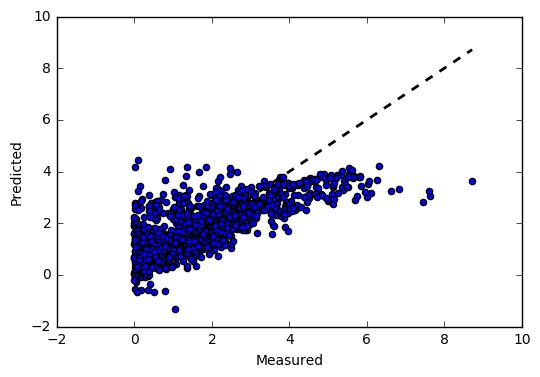

In [274]:
# Train linear ridge regression model using naive feature set
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model, cross_validation, metrics, ensemble
num_samples=train_dataset.shape[0]
#this won't work if num_samples are too small, if num_samples is too small, all Y is 0( the first number type), so it has to be large engouh
(samples, width, height) = train_dataset.shape
X = np.reshape(train_dataset,(samples,width*height))[0:num_samples]
Y = train_labels[0:num_samples]

#alpha is a tuning parameter affecting how regression deals with collinear inputs
linear = linear_model.Ridge(alpha = 0.6)  

cv = cross_validation.ShuffleSplit(len(Y),n_iter=10, test_size=0.1, random_state=0)

scores = cross_validation.cross_val_score(linear, X,Y, cv=cv, scoring='mean_absolute_error')

print("The MAE of the linear ridge regression band gap model using the naive feature set is: "+ str(round(abs(mean(scores)), 3)) + " eV")
############# plot it##########################################
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linear, X, Y, cv=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()